In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [2]:
# %config InlineBackend.rc={'figure.figsize': (12, 8)}

In [3]:
# Params:
eye_size = False

In [4]:
path = os.getcwd().replace('auxiliaries', 'pupil_deep/eye_test/label/')

In [5]:
def outlier_treatment(dataset):
    std = dataset['radius'].std()
    median = dataset['radius'].mean()
    
    for i in range(0, len(dataset)):
        if (abs(dataset['radius'][i] - median)*1.2) > std:
            dataset['radius'][i] = None

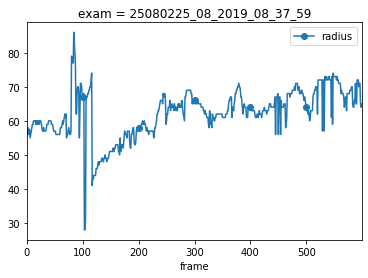

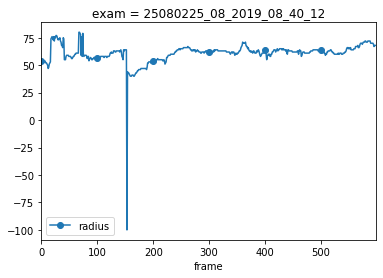

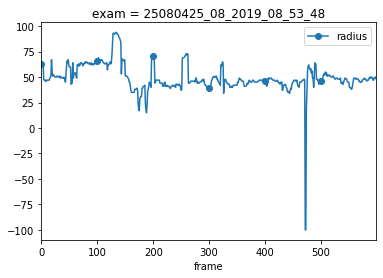

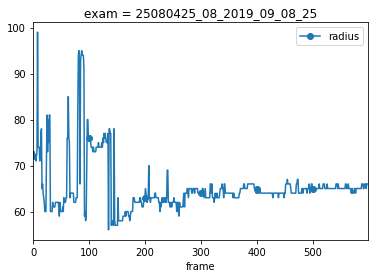

In [6]:
for file in os.listdir(path):
    if '.csv' in file:
        path_data = os.path.join(path, file)
        dataset = pd.read_csv(path_data)
        exam = file.replace('_label.csv', '')
        title = 'exam = {}'.format(exam)
        
        # outlier_treatment(dataset)

        if eye_size:
            ax = dataset.plot.line(x='frame', y=['radius', 'eye_size'],
                                   linestyle='-', markevery=100, marker='o', title=title)
        else:
            ax = dataset.plot.line(x='frame', y='radius',
                                   linestyle='-', markevery=100, marker='o', title=title)

        ax.figure.savefig('{}/graphics_{}.pdf'.format(path, exam))